In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('D:/vs_projects/movie-recommender/data/films_data.csv')
data.head()

,title,type,genre,imdb_rating,summary,plot
0,? (фильм),film,драматический фильм,7.0,«?» (индон. Tanda Tanya) — индонезийский худож...,Основная тема фильма — межрелигиозные отношени...
1,...а пятый всадник – Страх,film,драма военный артхаус,7.2,«…а пятый всадник — Страх» (чеш. …a páty jezde...,Прага во время немецкой оккупации Чехословакии...
2,…и передайте привет ласточкам,film,драма военный,6.8,«…и передайте привет ласточкам» — (чеш. ...a p...,"Конец 1942 года, нацистская тюрьма в Бреслау. ..."
3,«Чудотворец» из Бирюлёва,film,игровое кино,NaN,«Чудотворец из Бирюлёва» — советский короткоме...,Жена ответственного работника Зоя Фёдоровна на...
4,(Не)идеальные роботы,film,комедия фантастика,5.4,«(Не)идеальные роботы» (англ. Robots) — художе...,Действие фильма разворачивается в далёком буду...


In [21]:
data.shape

(45812, 6)

In [22]:
data.dtypes

title           object
type            object
genre           object
imdb_rating    float64
summary         object
plot            object
dtype: object

<Figure size 4000x4000 with 0 Axes>

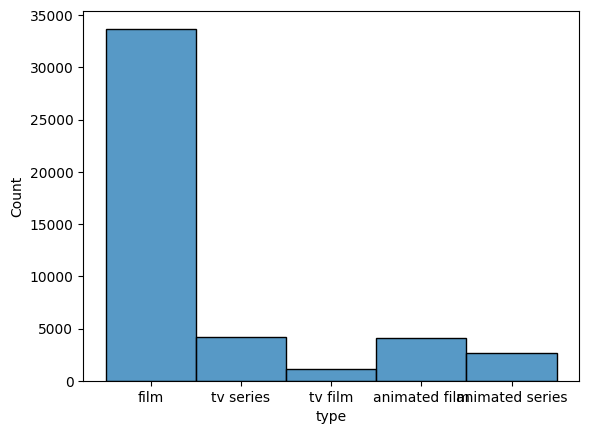

<Figure size 4000x4000 with 0 Axes>

In [23]:
sns.histplot(data=data.type, bins=20)

plt.figure(figsize=(40, 40))

In [24]:
data.isna().sum()

title             0
type              0
genre           812
imdb_rating    5617
summary           0
plot           3857
dtype: int64

In [25]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data['full_text'] = data['summary'].fillna('') + '.\n' + data['plot'].fillna('')

In [26]:
import pymorphy2
import multiprocessing
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger

morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words("russian"))

In [27]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    
    words = word_tokenize(text)
    
    words = [morph.parse(word)[0].normal_form for word in words if word not in stop_words]
    return " ".join(words)


In [29]:
data["processed_text"] = data["summary"].apply(preprocess_text)

In [30]:
preprocess_data = data
preprocess_data.head()

,title,type,genre,imdb_rating,summary,plot,full_text,processed_text
0,? (фильм),film,драматический фильм,7.0,«?» (индон. Tanda Tanya) — индонезийский худож...,Основная тема фильма — межрелигиозные отношени...,«?» (индон. Tanda Tanya) — индонезийский худож...,индон tanda tanya индонезийский художественный...
1,...а пятый всадник – Страх,film,драма военный артхаус,7.2,«…а пятый всадник — Страх» (чеш. …a páty jezde...,Прага во время немецкой оккупации Чехословакии...,«…а пятый всадник — Страх» (чеш. …a páty jezde...,пятый всадник страх чеш a páty jezdec je strac...
2,…и передайте привет ласточкам,film,драма военный,6.8,«…и передайте привет ласточкам» — (чеш. ...a p...,"Конец 1942 года, нацистская тюрьма в Бреслау. ...",«…и передайте привет ласточкам» — (чеш. ...a p...,передать привет ласточка чеш a pozdravuj vlašt...
3,«Чудотворец» из Бирюлёва,film,игровое кино,NaN,«Чудотворец из Бирюлёва» — советский короткоме...,Жена ответственного работника Зоя Фёдоровна на...,«Чудотворец из Бирюлёва» — советский короткоме...,чудотворец бирюлёво советский короткометражный...
4,(Не)идеальные роботы,film,комедия фантастика,5.4,«(Не)идеальные роботы» (англ. Robots) — художе...,Действие фильма разворачивается в далёком буду...,«(Не)идеальные роботы» (англ. Robots) — художе...,идеальный робот англ robots художественный фил...


In [31]:
preprocess_data.head()

,title,type,genre,imdb_rating,summary,plot,full_text,processed_text
0,? (фильм),film,драматический фильм,7.0,«?» (индон. Tanda Tanya) — индонезийский худож...,Основная тема фильма — межрелигиозные отношени...,«?» (индон. Tanda Tanya) — индонезийский худож...,индон tanda tanya индонезийский художественный...
1,...а пятый всадник – Страх,film,драма военный артхаус,7.2,«…а пятый всадник — Страх» (чеш. …a páty jezde...,Прага во время немецкой оккупации Чехословакии...,«…а пятый всадник — Страх» (чеш. …a páty jezde...,пятый всадник страх чеш a páty jezdec je strac...
2,…и передайте привет ласточкам,film,драма военный,6.8,«…и передайте привет ласточкам» — (чеш. ...a p...,"Конец 1942 года, нацистская тюрьма в Бреслау. ...",«…и передайте привет ласточкам» — (чеш. ...a p...,передать привет ласточка чеш a pozdravuj vlašt...
3,«Чудотворец» из Бирюлёва,film,игровое кино,NaN,«Чудотворец из Бирюлёва» — советский короткоме...,Жена ответственного работника Зоя Фёдоровна на...,«Чудотворец из Бирюлёва» — советский короткоме...,чудотворец бирюлёво советский короткометражный...
4,(Не)идеальные роботы,film,комедия фантастика,5.4,«(Не)идеальные роботы» (англ. Robots) — художе...,Действие фильма разворачивается в далёком буду...,«(Не)идеальные роботы» (англ. Robots) — художе...,идеальный робот англ robots художественный фил...


In [32]:
from sklearn.preprocessing import MultiLabelBinarizer


preprocess_data["genre"] = preprocess_data["genre"].apply(lambda x: x.split(" ") if isinstance(x, str) else [])

mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(preprocess_data["genre"])
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_)

In [33]:
from nltk.corpus import stopwords

morph = MorphAnalyzer()
stop_words = set(stopwords.words("russian")) 

def clean_genres(genres):
    if not isinstance(genres, list):
        return [] 

    cleaned_genres = []
    for genre in genres:
        genre = re.sub(r"[^а-яА-ЯёЁ\s]", "", genre).strip()

        genre = morph.parse(genre)[0].normal_form

        if genre not in stop_words and len(genre) > 2 and genre not in ['фильм', 'кино']:
            cleaned_genres.append(genre)

    return list(set(cleaned_genres)) 

preprocess_data["genre"] = preprocess_data["genre"].apply(clean_genres)

In [34]:
top_genres = preprocess_data['genre'].explode().value_counts()
print(top_genres.index[:100])

Index(['драма', 'комедия', 'триллер', 'боевик', 'мелодрама', 'фантастика',
       'приключение', 'ужас', 'фэнтези', 'исторический', 'детектив',
       'драматический', 'военный', 'криминальный', 'семейный',
       'документальный', 'приключенческий', 'научный', 'музыкальный',
       'комедийный', 'сказка', 'романтический', 'экранизация', 'нуар',
       'криминал', 'мистика', 'мюзикл', 'кинокомедия', 'вестерн',
       'психологический', 'биографический', 'детский', 'романтика',
       'биография', 'чёрный', 'ситком', 'трагикомедия', 'фильмбиография',
       'повседневность', 'детективный', 'роман', 'мех', 'история',
       'научнофантастический', 'мультфильм', 'немой', 'сатира', 'комедиядрама',
       'спортивный', 'киноповесть', 'слэшер', 'школа', 'эротика',
       'фэнтезийный', 'фильмтриллер', 'пародия', 'сэйнэн', 'этти',
       'супергероика', 'шпионский', 'притча', 'супергеройский', 'подростковый',
       'социальный', 'опера', 'фильмдрама', 'махосёдзё', 'сериал', 'боевой',
       

In [35]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocess_data["processed_text"])

In [36]:
from scipy.sparse import hstack

genre_weight = np.float32(0.5)

tfidf_matrix = tfidf_matrix.astype("float32")
genre_matrix = genre_matrix.astype("float32")

combined_matrix = hstack([tfidf_matrix, genre_matrix*genre_weight])
combined_matrix = combined_matrix.tocsr()

## Добавление оценки

In [37]:
from scipy.sparse import csr_matrix

preprocess_data['rating_scaled'] = preprocess_data['imdb_rating']/10
preprocess_data["rating_scaled"] = preprocess_data["rating_scaled"].fillna(0)
rating_matrix = csr_matrix(preprocess_data["rating_scaled"].values.reshape(-1, 1))
combined_matrix = hstack([combined_matrix, rating_matrix]).tocsr()

In [38]:
preprocess_data.head()

,title,type,genre,imdb_rating,summary,plot,full_text,processed_text,rating_scaled
0,? (фильм),film,[драматический],7.0,«?» (индон. Tanda Tanya) — индонезийский худож...,Основная тема фильма — межрелигиозные отношени...,«?» (индон. Tanda Tanya) — индонезийский худож...,индон tanda tanya индонезийский художественный...,0.70
1,...а пятый всадник – Страх,film,"[артхаус, военный, драма]",7.2,«…а пятый всадник — Страх» (чеш. …a páty jezde...,Прага во время немецкой оккупации Чехословакии...,«…а пятый всадник — Страх» (чеш. …a páty jezde...,пятый всадник страх чеш a páty jezdec je strac...,0.72
2,…и передайте привет ласточкам,film,"[военный, драма]",6.8,«…и передайте привет ласточкам» — (чеш. ...a p...,"Конец 1942 года, нацистская тюрьма в Бреслау. ...",«…и передайте привет ласточкам» — (чеш. ...a p...,передать привет ласточка чеш a pozdravuj vlašt...,0.68
3,«Чудотворец» из Бирюлёва,film,[игровой],NaN,«Чудотворец из Бирюлёва» — советский короткоме...,Жена ответственного работника Зоя Фёдоровна на...,«Чудотворец из Бирюлёва» — советский короткоме...,чудотворец бирюлёво советский короткометражный...,0.00
4,(Не)идеальные роботы,film,"[комедия, фантастика]",5.4,«(Не)идеальные роботы» (англ. Robots) — художе...,Действие фильма разворачивается в далёком буду...,«(Не)идеальные роботы» (англ. Robots) — художе...,идеальный робот англ robots художественный фил...,0.54


In [1]:
preprocess_data.isna().sum()

NameError: name 'preprocess_data' is not defined

In [39]:
from scipy.sparse import save_npz

save_npz("combined_matrix.npz", combined_matrix)

In [40]:
preprocess_data.to_csv("final_process_data.csv", index=False)

In [41]:
preprocess_data.head()

,title,type,genre,imdb_rating,summary,plot,full_text,processed_text,rating_scaled
0,? (фильм),film,[драматический],7.0,«?» (индон. Tanda Tanya) — индонезийский худож...,Основная тема фильма — межрелигиозные отношени...,«?» (индон. Tanda Tanya) — индонезийский худож...,индон tanda tanya индонезийский художественный...,0.70
1,...а пятый всадник – Страх,film,"[артхаус, военный, драма]",7.2,«…а пятый всадник — Страх» (чеш. …a páty jezde...,Прага во время немецкой оккупации Чехословакии...,«…а пятый всадник — Страх» (чеш. …a páty jezde...,пятый всадник страх чеш a páty jezdec je strac...,0.72
2,…и передайте привет ласточкам,film,"[военный, драма]",6.8,«…и передайте привет ласточкам» — (чеш. ...a p...,"Конец 1942 года, нацистская тюрьма в Бреслау. ...",«…и передайте привет ласточкам» — (чеш. ...a p...,передать привет ласточка чеш a pozdravuj vlašt...,0.68
3,«Чудотворец» из Бирюлёва,film,[игровой],NaN,«Чудотворец из Бирюлёва» — советский короткоме...,Жена ответственного работника Зоя Фёдоровна на...,«Чудотворец из Бирюлёва» — советский короткоме...,чудотворец бирюлёво советский короткометражный...,0.00
4,(Не)идеальные роботы,film,"[комедия, фантастика]",5.4,«(Не)идеальные роботы» (англ. Robots) — художе...,Действие фильма разворачивается в далёком буду...,«(Не)идеальные роботы» (англ. Robots) — художе...,идеальный робот англ robots художественный фил...,0.54


In [46]:
preprocess_data['genre'].value_counts()

genre
[драма]                                          5635
[комедия]                                        2992
[мелодрама]                                      1048
[документальный]                                  927
[]                                                860
                                                 ... 
[романтика, драма, школа]                           1
[пародия, романтический, комедия, фэнтези]          1
[приключение, мех, гарем, фэнтези, романтика]       1
[романтический, этти, комедия]                      1
[спокон, романтический, драма, комедия]             1
Name: count, Length: 7445, dtype: int64

## KNN

In [150]:
movie_id = 11
print(preprocess_data.iloc[movie_id][['title', 'genre', 'imdb_rating']])

similar_movies, scores = find_similar_movies(movie_id, nn_model, combined_matrix, 20)

res_df = pd.DataFrame({'title': [], 'genre': [], 'imdb_rating': []})

for i in range(len(similar_movies)):
    if preprocess_data.iloc[similar_movies[i]]['title'] != preprocess_data.iloc[movie_id]['title']:
        res_df.loc[i] = preprocess_data.iloc[similar_movies[i]][['title', 'genre', 'imdb_rating']]
res_df.head(19)

title                             1+1 (фильм)
genre          [драма, комедийный, баддимуви]
imdb_rating                               8.5
Name: 11, dtype: object


,title,genre,imdb_rating
1,1+1: Голливудская история,"[драма, комедийный]",7.0
2,Мой парень — псих,"[драма, комедийный]",7.7
3,Во имя отца,[драма],8.1
4,Форрест Гамп,"[драма, комедийный]",8.8
5,Красота по-американски,"[драма, комедийный]",8.3
6,Грызня,"[драма, комедийный]",8.1
7,Общество мёртвых поэтов,"[драма, комедийный]",8.1
8,"Охота (фильм, 2012)",[драма],8.3
9,История игрушек: Большой побег,"[драма, комедийный]",8.3
10,Побег из Шоушенка,[драма],9.3


In [6]:
import pandas as pd

preprocess_data = pd.read_csv("D:/vs_projects/movie-recommender/data/final_process_data.csv")
preprocess_data['imdb_rating'] = preprocess_data['imdb_rating'].fillna(0)

preprocess_data.to_csv("final_process_data.csv", index=False)


In [5]:
preprocess_data.isna().sum()

title                0
type                 0
genre                0
imdb_rating          0
summary              0
plot              3857
full_text            0
processed_text       0
rating_scaled        0
dtype: int64

## cosine_similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_movies(movie_index, tfidf_matrix, top_n=10):
    query_vector = tfidf_matrix[movie_index].reshape(1, -1)
    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()  
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]
    return similar_indices, similarities[similar_indices]


In [80]:
movie_id = 11
print(preprocess_data.iloc[movie_id][['title', 'genre']])

similar_movies, scores = find_similar_movies(movie_id, similarity_matrix)

res_df = pd.DataFrame({'title': [], 'genre': []})

for i in range(len(similar_movies)):
    res_df.loc[i] = preprocess_data.iloc[similar_movies[i]][['title', 'genre']]
res_df.head(10)

title                       1+1 (фильм)
genre    [драма, комедийный, баддимуви]
Name: 11, dtype: object


MemoryError: Unable to allocate 7.82 GiB for an array with shape (45812, 45812) and data type float32